In [1]:
# Data cleaning and Preprocessing
# 23_06_2025

In [3]:
import pandas as pd

In [ ]:
# Task 1 : Import the dataset and explore basic info (nulls, data types).

In [5]:
# Importing the dataset

data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Finding the sape of the dataset

data.shape

(891, 12)

In [9]:
# Finding the info regarding the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Counting the numm values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Task 2 : Handle missing values using mean/median/imputation.

In [19]:
# 'Age', 'Cabin' and 'Embarked' columns has missing values.

In [25]:
# Filling the missing 'Age' with mean

data['Age'].fillna(data['Age'].mean(), inplace=True)

C:\Users\Avanee\AppData\Local\Temp\ipykernel_16488\4085626387.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [29]:
# Using 'Unknown' to fill the missing 'Cabin'

data['Cabin'].fillna('Unknown', inplace=True)

C:\Users\Avanee\AppData\Local\Temp\ipykernel_16488\624189944.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown', inplace=True)


In [33]:
# using mode to handle missing values in 'Embarked'

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\Avanee\AppData\Local\Temp\ipykernel_16488\1636610585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [35]:
# Checking if the missing values are successfully removed or not

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
# Task 3 : Convert categorical features into numerical using encoding.

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [41]:
# Encoding 'Sex' (Male = 1, Female = 0)

data['Sex'] = le.fit_transform(data['Sex'])

In [43]:
# Encoding 'Embarked'

data['Embarked'] = le.fit_transform(data['Embarked'])

In [45]:
# Simplifing 'Cabin' to its first letter (represents the deck)

data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
data['Cabin'] = le.fit_transform(data['Cabin'])

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [51]:
# Task 4 : Normalize/standardize the numerical features.

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Selecting numerical features

numerical_features = ['Age', 'Fare']

In [57]:
# Standardizing

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head() # Checking 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.502445,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,0.786845,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.488854,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.420730,2,2
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.486337,8,2


In [59]:
# Task 5 : Visualize outliers using boxplots and remove them.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

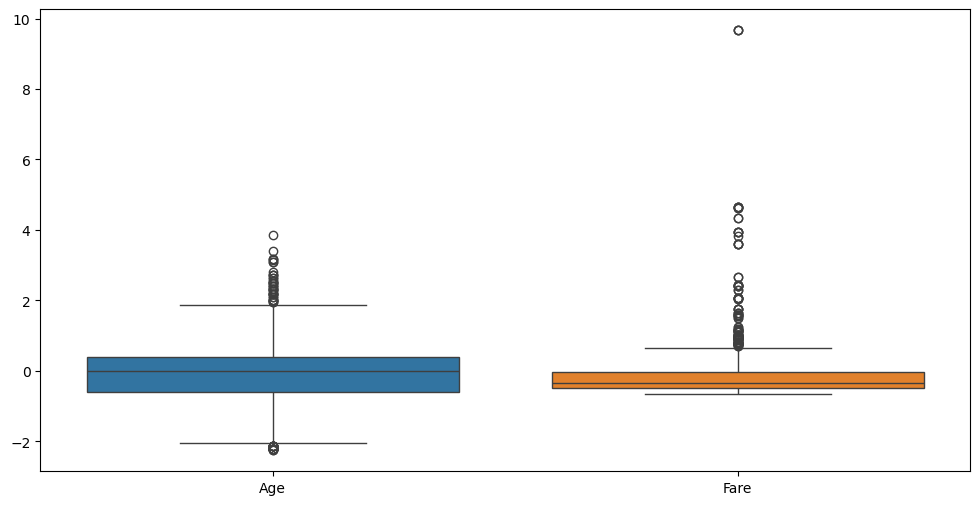

In [63]:
# Visualizing outliers using box plot

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.show()

In [65]:
# Outlier Handling using Capping (since we can't drop data)

Q1 = data[['Age', 'Fare']].quantile(0.25)
Q3 = data[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

In [67]:
# Applying capping to handle outliers

for feature in ['Age', 'Fare']:
    lower_bound = Q1[feature] - 1.5 * IQR[feature]
    upper_bound = Q3[feature] + 1.5 * IQR[feature]
    
    data[feature] = data[feature].apply(lambda x: lower_bound if x < lower_bound else x)
    data[feature] = data[feature].apply(lambda x: upper_bound if x > upper_bound else x)

print(f'Dataset shape after capping outliers: {data.shape}')

Dataset shape after capping outliers: (891, 12)


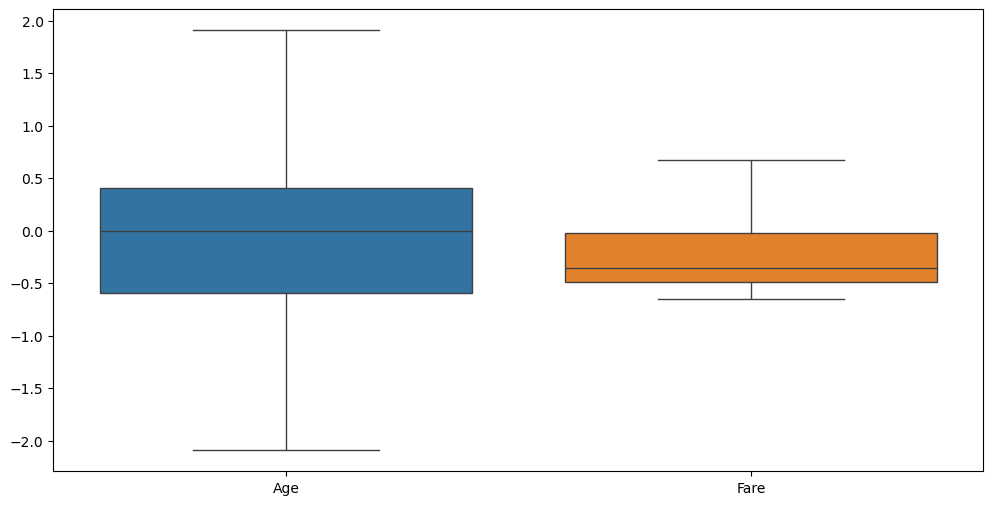

In [69]:
# Visualizing outliers using box plot after handling the outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.show()